In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

### Introduction

### Loading and splitting the data
In this section the data is loaded.
The data is also split into three sets training, validation and test.

* Training is done for training of the model
* Validation is for validation and tuning of the hyperparameters in the model
* Testing is done for the final evaluation of the model

In [2]:
filename = os.path.join("data", "MldataCase.csv")
df = pd.read_csv(filename, header=[1])
print(f"Number of rows: {len(df)}")
df.head()

Number of rows: 1000


,fix_Time_mean,fix_Time_sd,progfix_Time_mean,regfix_Time_mean,fix_BXstd_mean,sac_BXdst_sd,sweep_BXdst_mean,sweep_BXdst_sd,fixToWordRatio,pNoiseDur,WCPM
0,311.8690,173.6547,316.1944,285.9167,0.1900,0.8591,9.5850,2.6666,1.1667,0.0118,169.86
1,554.6788,489.7481,597.9429,478.9667,0.1890,0.8824,13.1505,7.9595,2.6613,0.0375,36.17
2,248.1154,214.1027,215.7094,345.3333,0.3949,0.9629,5.3914,4.9921,2.5161,0.2354,72.15
3,333.4583,270.6688,353.9643,261.6875,0.2449,0.8419,8.4383,3.6587,1.9459,0.0679,88.10
4,195.7159,124.9656,202.8906,176.5833,0.3316,1.1677,8.2133,4.1155,1.4915,0.1438,180.47


In [3]:
# Split the data 80%, 10%, 10%
df_train, df_test = train_test_split(df, test_size=0.1)

print(len(df_train), len(df_test))

900 100


### EDA
In order to understand the realtion between features and the output a brief EDA is conducted.
Understanding the various correaltions serves two purposes

1) By understanding the the correaltions between target and variables, we will be able to build a better model.
2) Beside building a better model, the understanding itself might add value.

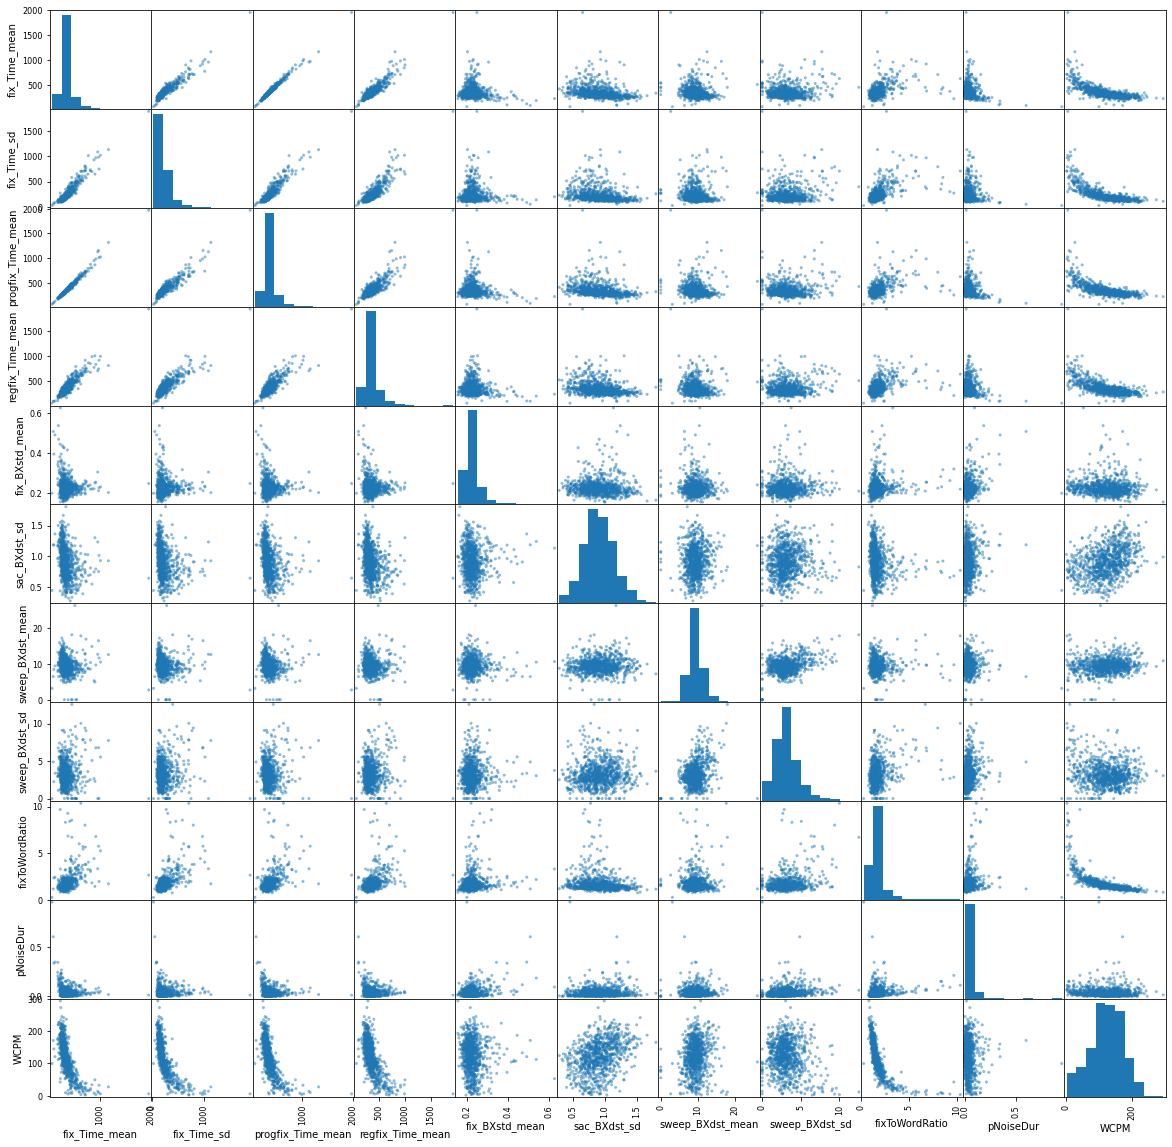

In [5]:
scatter_matrix(df_train, figsize=(20, 20));

#### Observations

### Feature engineering
We normalize det data here. With a scaler. Using same scaller for train and test.

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X = sc.fit_transform(X)

### Modelling (training)

In [6]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense# Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation="relu"))
model.add(Dense(12, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2021-10-06 15:39:32.480121: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-06 15:39:32.480298: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-06 15:39:32.492169: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
# Training of the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64)
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

### Evaluation

In [ ]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss']) plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

### Discussion